In [126]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
explained_variance=[]
dim = [1,2,3,4,5,6,7]
mse_list =[]

In [127]:
url = 'https://raw.githubusercontent.com/MananMohnot/DATA_DUMP/main/EE_769_assignment/DataPCA.csv'

In [128]:
df = pd.read_csv(url)
df.head()


,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367


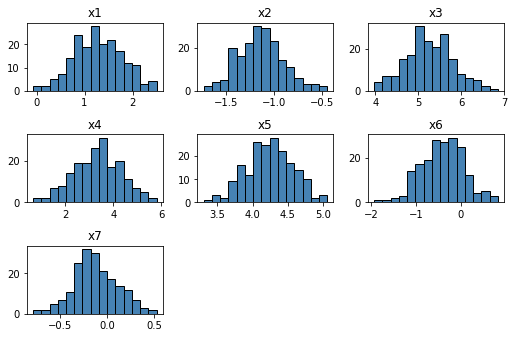

In [129]:
# Visualizing Data

df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,grid = False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

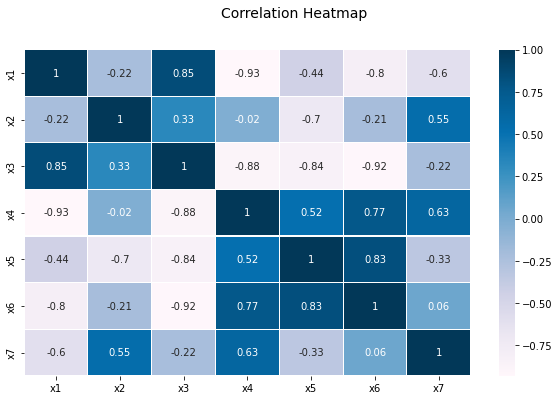

In [130]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="PuBu",
                 linewidths=.05)
t= f.suptitle('Correlation Heatmap', fontsize=14)

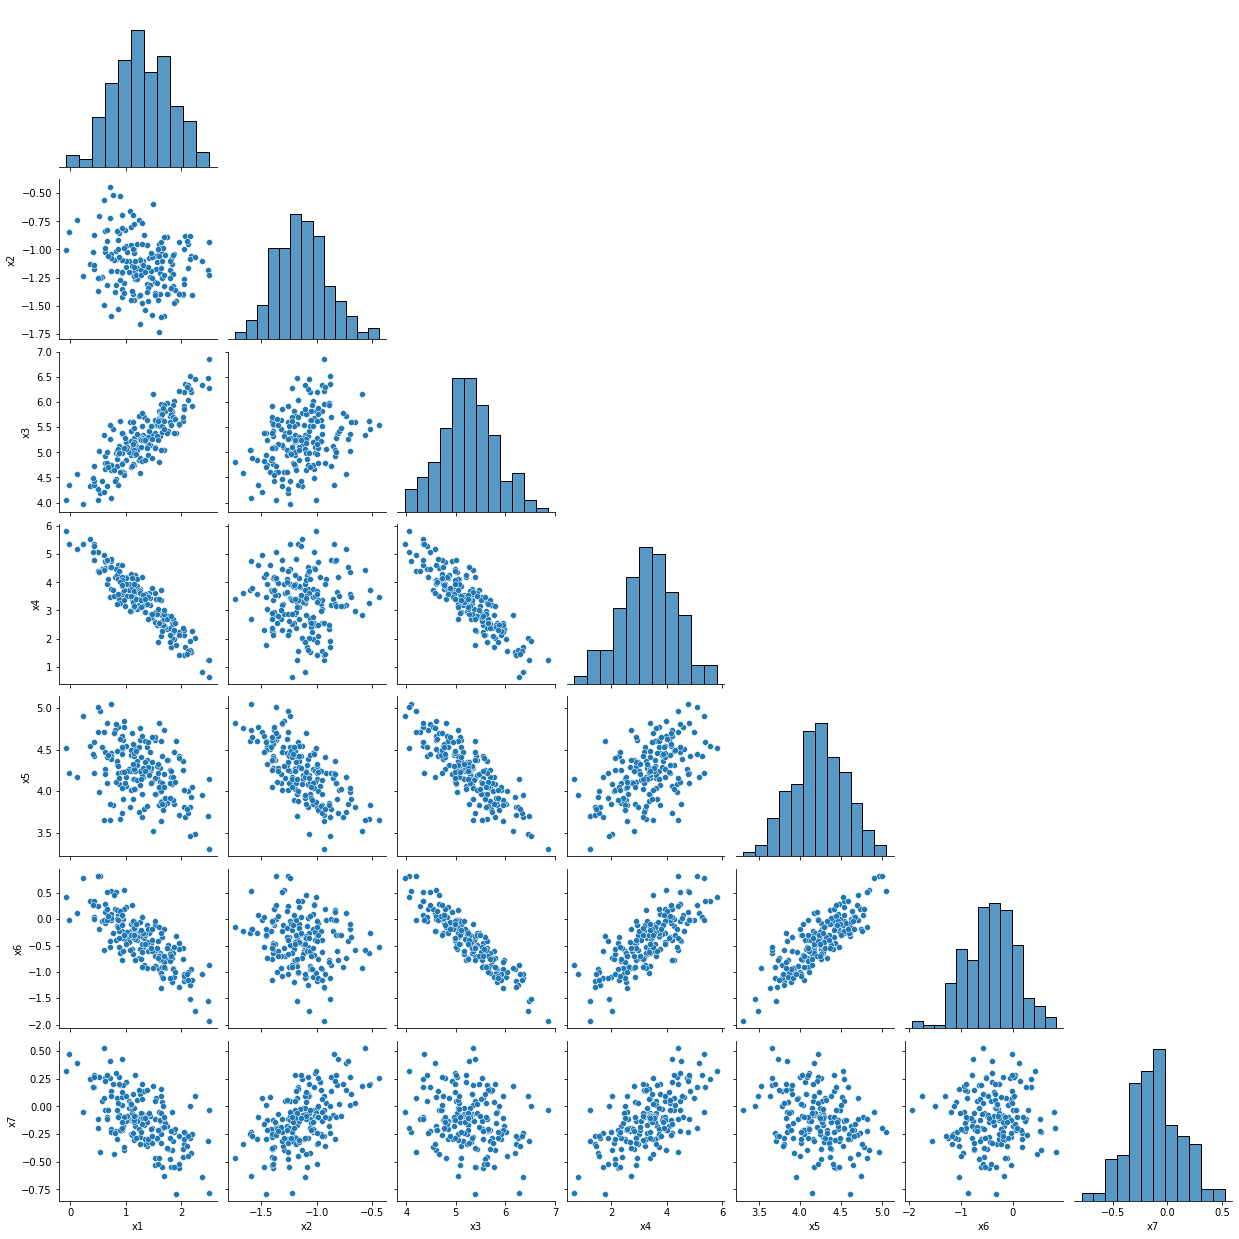

In [131]:
# Pair Plot
pp=sns.pairplot(df,corner = True )

In [132]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(df)

StandardScaler()

In [138]:
scaled_data = scalar.transform(df)
scaled_data

array([[-0.87970185,  0.20358106, -0.7178119 , ...,  0.24030982,
         0.572178  ,  0.81782988],
       [ 0.06690112, -0.16483345, -0.01377784, ...,  0.15160586,
         0.10228252, -0.215624  ],
       [ 0.49517799, -0.17241562,  0.55017623, ..., -0.80067599,
        -0.98890001,  0.83524673],
       ...,
       [ 0.7726511 , -0.39257257,  0.65526181, ..., -0.57237401,
        -1.02614162,  0.08363971],
       [ 0.80132199, -0.80445602,  0.39375587, ..., -0.07767042,
        -0.58435868, -0.29291356],
       [ 1.02385053, -0.906317  ,  0.5235481 , ...,  0.02058323,
        -0.57800454, -0.43309953]])

In [134]:
from sklearn.decomposition import PCA

In [135]:
for d in dim:
  pca = PCA(n_components=d)
  pca.fit(scaled_data)
  X_pca = pca.transform(scaled_data)
  X_new = pca.inverse_transform(X_pca)
  mse = (np.square(X_new - scaled_data)).mean(axis=None)
  mse_list.append(mse)
  explained_variance.append(pca.explained_variance_)
  


The mse for dimension 1 is 0.39072943283022843
The mse for dimension 2 is 0.07126846555354302
The mse for dimension 3 is 0.0063122644854415886
The mse for dimension 4 is 0.00023987869019137425
The mse for dimension 5 is 2.3851029452934086e-05
The mse for dimension 6 is 4.004945107075585e-06
The mse for dimension 7 is 1.6457107272662935e-31


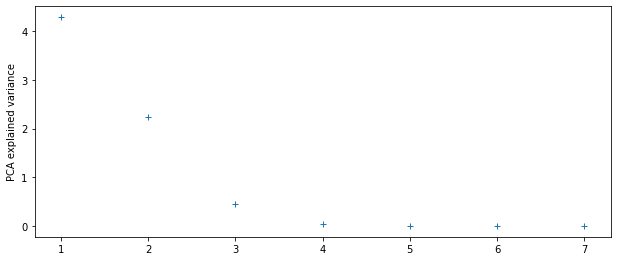

In [142]:
for i,m in enumerate(mse_list):
  print('The mse for dimension {} is {}'.format(i+1,m))
fig = plt.figure(figsize =(10, 4)) 
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.plot(np.arange(1, pca.n_components + 1),explained_variance[-1], "+", linewidth=2)
plt.ylabel("PCA explained variance")
plt.show()